# Importing libraries and load data

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils


(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Understanding data

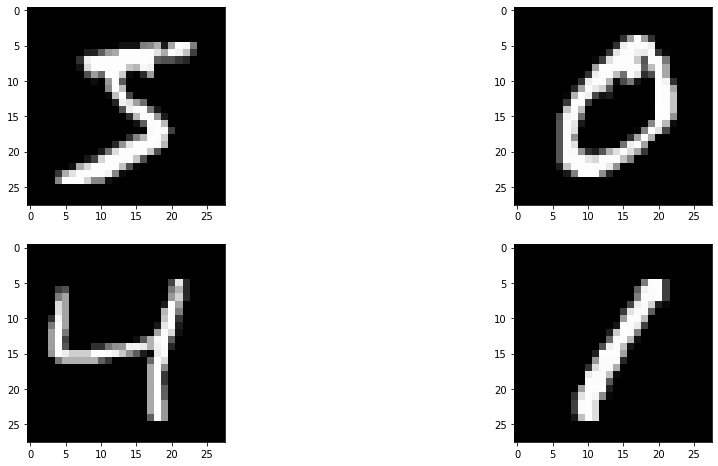

In [7]:
plt.figure(figsize=(16,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(x_train[i], cmap='gray')
plt.show()

In [8]:
print(x_train[0][0][0])
print(x_train[0][7][15])

0
253


Images are represented in one channel

From 0(black) to 255(white)

Background has value 0, and everything that has been written has value greater than 0

In [9]:
y_train[0]

5

I need a matrix with zeros and one on 5th index for y

# Preparing data

In [10]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1]**2))
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]**2)

In [11]:
x_train.shape

(60000, 784)

In [12]:
def adjust_data(x):
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if x[i][j] > 0:
                x[i][j] = 1

adjust_data(x_train)
adjust_data(x_test)

In [13]:
x_train[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,

# Making model 

First, I'd like to try guessing the number

In [14]:
from sklearn.metrics import accuracy_score

def guess(x, y):
    rand = []  
    for i in range(x.shape[0]):
        rand.append(np.random.randint(0,10))
    
    y = [np.argmax(i) for i in y]
    acc = accuracy_score(y, rand) * 100
    
    return acc

guess(x_train, y_train)

10.025

Guessing have around 10% accuracy, like everyone can expect

# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [16]:
acc = accuracy_score(y_test, pred) * 100
acc

89.55

It's significant better than guessing

# Random Forest 

Let's check what number of n_estimators is best

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [20, 50, 100]}

forest = RandomForestClassifier()

gridsearch = GridSearchCV(estimator=forest, param_grid=parameters, cv=3)

best_model = gridsearch.fit(x_train, y_train)
best_model

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [18]:
best_model.best_estimator_.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [19]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
pred = model.predict(x_test)
acc = accuracy_score(y_test, pred) * 100
acc

96.88

# Neural network

I need to change y's (outputs)

In [20]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Create model

In [21]:
from keras import models
from keras import layers

def create_model():
    model = models.Sequential()
    model.add(layers.Dense(256, activation="relu", input_shape=(784,)))
    model.add(layers.Dense(128, activation="relu"))
    model.add(layers.Dense(10, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

model = create_model()

I need validation data also for better view of results

In [22]:
import math

x_val = x_train[math.ceil(x_train.shape[0] * .7) :]
y_val = y_train[math.ceil(y_train.shape[0] * .7) :]
x_train = x_train[: math.ceil(x_train.shape[0] * .7)]
y_train = y_train[: math.ceil(y_train.shape[0] * .7)]

In [23]:
history = model.fit(x_train, y_train, epochs=10, verbose=1, batch_size=128, validation_data=(x_val, y_val))

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 2s 41us/step - loss: 0.3317 - accuracy: 0.9017 - val_loss: 0.1977 - val_accuracy: 0.9383
Epoch 2/10
42000/42000 [==============================] - 2s 37us/step - loss: 0.1411 - accuracy: 0.9567 - val_loss: 0.1644 - val_accuracy: 0.9486
Epoch 3/10
42000/42000 [==============================] - 2s 42us/step - loss: 0.0941 - accuracy: 0.9710 - val_loss: 0.1245 - val_accuracy: 0.9636
Epoch 4/10
42000/42000 [==============================] - 2s 40us/step - loss: 0.0707 - accuracy: 0.9778 - val_loss: 0.1322 - val_accuracy: 0.9626
Epoch 5/10
42000/42000 [==============================] - 2s 37us/step - loss: 0.0503 - accuracy: 0.9846 - val_loss: 0.1314 - val_accuracy: 0.9620
Epoch 6/10
42000/42000 [==============================] - 2s 39us/step - loss: 0.0398 - accuracy: 0.9871 - val_loss: 0.1299 - val_accuracy: 0.9634
Epoch 7/10
42000/42000 [==============================] - 2s 39us/st

In [24]:
pred = model.predict(x_test)
pred_max = [np.argmax(i) for i in pred]
y_test_max = [np.argmax(i) for i in y_test]
acc = accuracy_score(y_test_max, pred_max) * 100
acc

96.66

Visualize training history

In [25]:
training_loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(training_loss)+1)

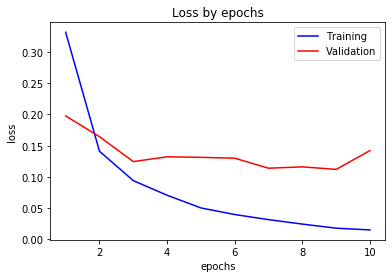

In [26]:
plt.plot(epochs, training_loss, "b")
plt.plot(epochs, val_loss, "r")
plt.title("Loss by epochs")
plt.legend(["Training", "Validation"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [27]:
training_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

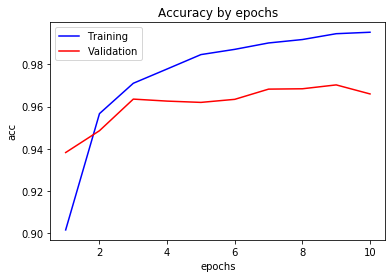

In [28]:
plt.plot(epochs, training_acc, "b")
plt.plot(epochs, val_acc, "r")
plt.title("Accuracy by epochs")
plt.legend(["Training", "Validation"])
plt.xlabel("epochs")
plt.ylabel("acc")
plt.show()

I can see here an overfitting.

I will try kernel regularizers to deal with overfitting

In [29]:
from keras import regularizers

def create_model():
    model = models.Sequential()
    model.add(layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.01), input_shape=(784,)))
    model.add(layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.Dense(10, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

model = create_model()
history = model.fit(x_train, y_train, epochs=20, verbose=1, batch_size=128, validation_data=(x_val, y_val))

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 2s 54us/step - loss: 1.6243 - accuracy: 0.8770 - val_loss: 0.6868 - val_accuracy: 0.8989
Epoch 2/20
42000/42000 [==============================] - 2s 41us/step - loss: 0.5705 - accuracy: 0.9175 - val_loss: 0.5289 - val_accuracy: 0.9124
Epoch 3/20
42000/42000 [==============================] - 2s 41us/step - loss: 0.4887 - accuracy: 0.9261 - val_loss: 0.4836 - val_accuracy: 0.9178
Epoch 4/20
42000/42000 [==============================] - 2s 45us/step - loss: 0.4580 - accuracy: 0.9307 - val_loss: 0.4338 - val_accuracy: 0.9343
Epoch 5/20
42000/42000 [==============================] - 2s 47us/step - loss: 0.4260 - accuracy: 0.9371 - val_loss: 0.4103 - val_accuracy: 0.9399
Epoch 6/20
42000/42000 [==============================] - 2s 49us/step - loss: 0.4050 - accuracy: 0.9414 - val_loss: 0.4042 - val_accuracy: 0.9365
Epoch 7/20
42000/42000 [==============================] - 2s 41us/st

In [30]:
pred = model.predict(x_test)
pred_max = [np.argmax(i) for i in pred]
y_test_max = [np.argmax(i) for i in y_test]
acc = accuracy_score(y_test_max, pred_max) * 100
acc

95.97

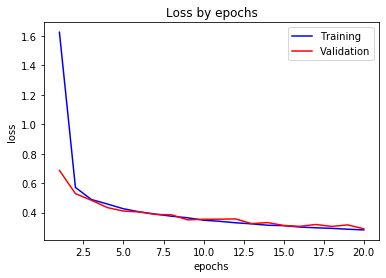

In [31]:
training_loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(training_loss)+1)
plt.plot(epochs, training_loss, "b")
plt.plot(epochs, val_loss, "r")
plt.title("Loss by epochs")
plt.legend(["Training", "Validation"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

It helped with overfitting but not so much

So i will try dropout

In [32]:
def create_model():
    model = models.Sequential()
    model.add(layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.01), input_shape=(784,)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(10, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

model = create_model()
history = model.fit(x_train, y_train, epochs=10, verbose=1, batch_size=128, validation_data=(x_val, y_val))

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 2s 58us/step - loss: 1.7022 - accuracy: 0.8539 - val_loss: 0.6840 - val_accuracy: 0.8970
Epoch 2/10
42000/42000 [==============================] - 2s 55us/step - loss: 0.6075 - accuracy: 0.9075 - val_loss: 0.5133 - val_accuracy: 0.9255
Epoch 3/10
42000/42000 [==============================] - 2s 51us/step - loss: 0.5386 - accuracy: 0.9149 - val_loss: 0.4809 - val_accuracy: 0.9311
Epoch 4/10
42000/42000 [==============================] - 2s 56us/step - loss: 0.5109 - accuracy: 0.9186 - val_loss: 0.4589 - val_accuracy: 0.9357
Epoch 5/10
42000/42000 [==============================] - 2s 51us/step - loss: 0.4835 - accuracy: 0.9242 - val_loss: 0.4554 - val_accuracy: 0.9333
Epoch 6/10
42000/42000 [==============================] - 2s 50us/step - loss: 0.4711 - accuracy: 0.9271 - val_loss: 0.4486 - val_accuracy: 0.9313
Epoch 7/10
42000/42000 [==============================] - 2s 48us/st

In [33]:
pred = model.predict(x_test)
pred_max = [np.argmax(i) for i in pred]
y_test_max = [np.argmax(i) for i in y_test]
acc = accuracy_score(y_test_max, pred_max) * 100
acc

93.8

First model was the best one (the simplest one)

Maybe this task isn't so complicated and doesn't need unnecessary complications

# Convolution neural network

First i need to reshape my data

In [34]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [35]:
from keras import optimizers

def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer='he_uniform'))
    model.add(layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer='he_uniform'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation="relu"))
    model.add(layers.Dense(10, activation="softmax"))
    
    sgd = optimizers.SGD(lr=0.01, momentum=0.9)
    model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
    return model

In [36]:
model = create_model()

history = model.fit(x_train, y_train, epochs=10, verbose=1, batch_size=128, validation_data=(x_val, y_val))

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 30s 724us/step - loss: 0.2819 - accuracy: 0.9112 - val_loss: 0.0986 - val_accuracy: 0.9694
Epoch 2/10
42000/42000 [==============================] - 30s 721us/step - loss: 0.0860 - accuracy: 0.9736 - val_loss: 0.0825 - val_accuracy: 0.9746
Epoch 3/10
42000/42000 [==============================] - 30s 717us/step - loss: 0.0630 - accuracy: 0.9802 - val_loss: 0.0716 - val_accuracy: 0.9785
Epoch 4/10
42000/42000 [==============================] - 34s 804us/step - loss: 0.0502 - accuracy: 0.9837 - val_loss: 0.0647 - val_accuracy: 0.9812
Epoch 5/10
42000/42000 [==============================] - 33s 781us/step - loss: 0.0394 - accuracy: 0.9872 - val_loss: 0.0595 - val_accuracy: 0.9820
Epoch 6/10
42000/42000 [==============================] - 31s 744us/step - loss: 0.0314 - accuracy: 0.9901 - val_loss: 0.0611 - val_accuracy: 0.9822
Epoch 7/10
42000/42000 [==============================] 

In [37]:
pred = model.predict(x_test)
pred_max = [np.argmax(i) for i in pred]
y_test_max = [np.argmax(i) for i in y_test]
acc = accuracy_score(y_test_max, pred_max) * 100
acc

98.47

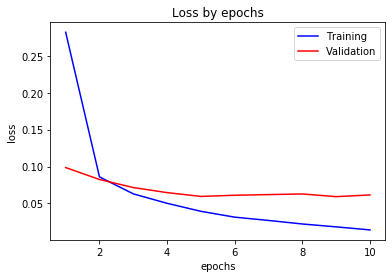

In [38]:
training_loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(training_loss)+1)
plt.plot(epochs, training_loss, "b")
plt.plot(epochs, val_loss, "r")
plt.title("Loss by epochs")
plt.legend(["Training", "Validation"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

I think it's pretty good score 

I was inspired by vgg16 creating this model

# I made some images with my progam Draw.py

Some of them

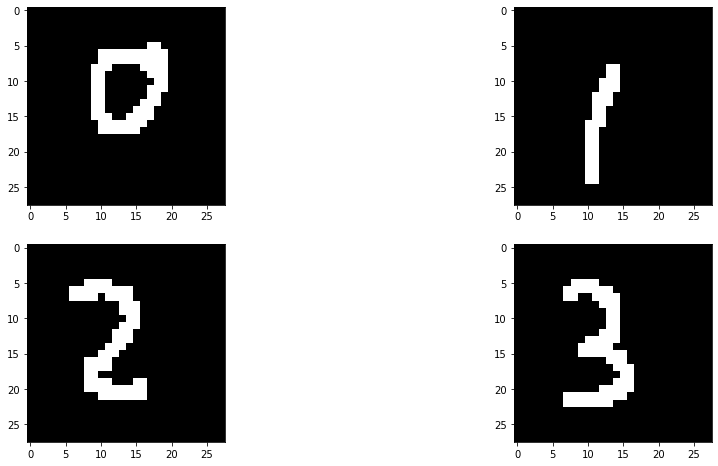

In [70]:
from numpy import loadtxt

image = []
image_label = []
number = 0
amount = 1
for i in range(200):
    image.append(loadtxt('images/{}/data_{}.csv'.format(number, amount), delimiter=','))
    image_label.append(number)
    amount += 1
    if amount%21 == 0:
        number += 1
        amount = 1
image = np.array(image)
image_label = np.array(image_label)

plt.figure(figsize=(16,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(image[i*20], cmap='gray')
plt.show()

In [71]:
image.shape

(200, 28, 28)

In [72]:
image = image.reshape(image.shape[0], image.shape[1], image.shape[2], 1)
image.shape

(200, 28, 28, 1)

In [73]:
image_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9])

In [122]:
pred = []
[pred.append(model.predict(image[i*20:(i+1)*20])) for i in range(10)]

pred = np.array(pred)
predict = []
for i in range(pred.shape[0]):
    for j in range(pred.shape[1]):
        predict.append(np.argmax(pred[i][j]))

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 7, 7, 2, 2, 2, 2, 2, 2]

In [130]:
correct = []
[correct.append(accuracy_score(predict[i*20:(i+1)*20], image_label[i*20:(i+1)*20])) for i in range(10)]
correct = np.array(correct)

for i in range(len(correct)):
    print('{}: {} accuracy'.format(i, correct[i]))

0: 0.5 accuracy
1: 0.4 accuracy
2: 0.85 accuracy
3: 0.85 accuracy
4: 0.9 accuracy
5: 0.85 accuracy
6: 0.1 accuracy
7: 0.75 accuracy
8: 0.65 accuracy
9: 0.6 accuracy


Model had problems with 0, 1 and 6. 

In [131]:
correct.mean()

0.645

It is not good score